<h1 style="text-align: center;" > GROUP NO: MS10182122 </h1>


#### Used Libraries:

- NumPy
- matplotlib.pyplot
- random
- Pandas


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import pandas as pd

/tmp/ipykernel_4349/250383209.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<h2 style="text-align: center;"> Question 1 </h2>


### 1(a) First Method, calculating area by grid method


In [3]:
def original_area(r):
    return np.pi * r**2

def accuracy(error):
    return np.round(100 - error,2)

Number of squares inside the circle: 316
Calculated area: 316.0
Original area: 314.1592653589793
Accuracy: 99.41%


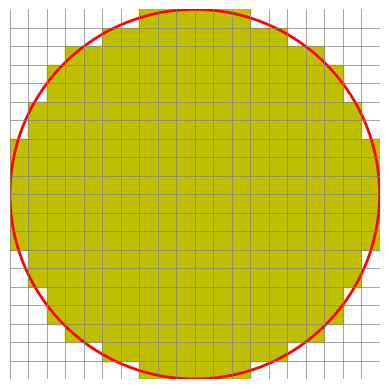

In [4]:
def generate_points(a):
    x_coordinates = []
    y_coordinates = []

    for i in range(-a//2, a//2):  
        for j in range(-a//2, a//2):
            x = i + 0.5
            y = j + 0.5
            x_coordinates.append(x)
            y_coordinates.append(y)

    points = list(zip(x_coordinates, y_coordinates))

    return points

def find_area_method1(r):
    points = generate_points(2 * r)
    
    inside_circle = 0
    total_points = len(points)

    for x, y in points:
        distance = np.sqrt(x**2 + y**2)
        if distance < r:
            inside_circle += 1

    area = 4 * (inside_circle / total_points) * (r**2)

    return np.round(area,3), inside_circle

def plot_diagram_method1(r):
    fig, ax = plt.subplots()
    ax.set_aspect('equal') 
    
    for i in range(-r, r):  
        plt.axhline(i , color='gray', linestyle='-', linewidth=0.5) 
        plt.axvline(i , color='gray', linestyle='-', linewidth=0.5) 

    for i in range(-r, r):  
        for j in range(-r, r):
            x = i + 0.5
            y = j + 0.5
            distance = np.sqrt(x**2 + y**2)
            if distance < r:
                square = plt.Rectangle((i, j), 1, 1, color='y')
                ax.add_patch(square)

    circle = plt.Circle((0, 0), r, color='r', fill=False, linewidth=2) 
    ax.add_patch(circle)

    plt.xlim(-r, r)
    plt.ylim(-r, r)
    plt.axis('off')
    plt.show()

r = 10

area, circles = find_area_method1(r)

def error_method1(r):
    return 100 * (np.abs(original_area(r) - area) / original_area(r)) 

print(f"Number of squares inside the circle: {circles}")
print(f"Calculated area: {area}")
print(f"Original area: {original_area(r)}")
print(f"Accuracy: {accuracy(error_method1(r))}%")
plot_diagram_method1(r)


### 1(b) Second Method, calculating area by generating random points inside a square


Original area: 4778.362426110075
Calculated area: 4812.444
Accuracy: 99.29


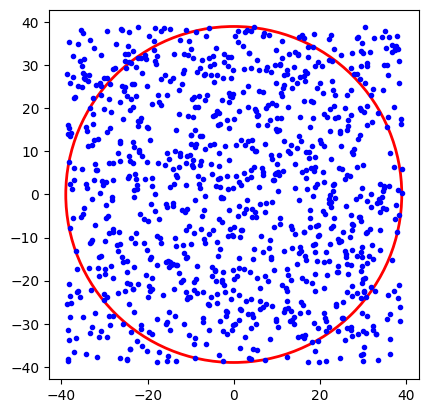

In [5]:
def generate_random_points(r, total_points):
    x = np.random.uniform(-r, r, total_points)
    y = np.random.uniform(-r, r, total_points)
    
    points = list(zip(x, y)) # Using tuple to store coordinates
    
    return points

def find_area_method2(r, total_points):
    points = generate_random_points(r, total_points)
    
    inside_circle = 0
    outside_circle = 0
    
    for x, y in points:
        distance = np.sqrt(x**2 + y**2)
        if distance <= r:
            inside_circle += 1
        else:
            outside_circle += 1
    
    area = (inside_circle / total_points) * (r**2) * 4
    
    return area

def error_method2(r, area):
    return 100 * (np.abs(original_area(r) - area) / original_area(r)) 

def plot_diagram_method2(r, points):
    circle = plt.Circle((0, 0), r, color='r', fill=False, linestyle='solid',linewidth=2)
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal') 
    ax.add_patch(circle)
    
    x, y = zip(*generate_random_points(r, points)) # Unpacking tuple made in generate points

    plt.scatter(x, y, color='b', marker='.')

    plt.show()

r = 39
points = 1000

area = find_area_method2(r, points)

print("Original area:", original_area(r))
print("Calculated area:", area)
print("Accuracy:", accuracy(error_method2(r, area)))

plot_diagram_method2(r, points)

### Additional Method: Egyptian Octagon Method

First we will consider a square of side length 2\*radius of the circle and then divide the square into 9 equal parts. Now we see that corner squares are just half filled by the circle area. So we will consider half of their area.

$A_{outerSquare} = 4r^2, r = radius$

$A_{smallSquare} = \frac {A_{outerSqaure}}{9}$

$A_{cirlce} = A_{outerSquare} - \frac {A_{smallSquare}}{2} * 4$

$=> A_{circle} = A_{outerSquare} - 2*A_{smallSquare}$

$=> A_{circle} = A_{outerSquare} - 2 * \frac {A_{outerSquare}} {9}$

$=> A_{circle} = \frac {7}{9} * A_{outerSquare}$


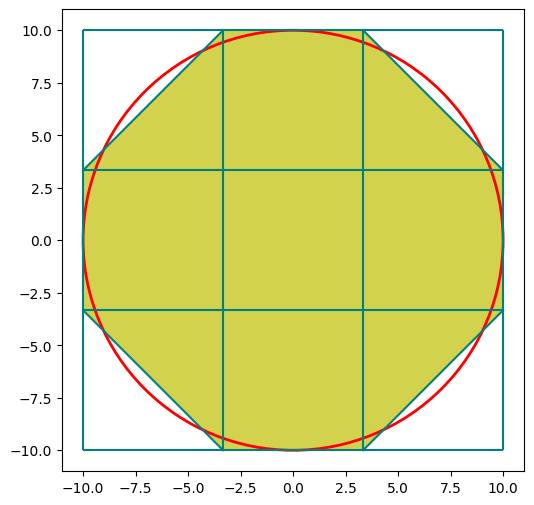

Original area: 314.1592653589793
Calculated area: 311.1111111111111
Accuracy: 99.03


In [6]:
def egyptian_octagon(r):
    area = ((7/9) * r * r)*4
    return area
    

def error_method3(r, area):
    og_area = original_area(r)
    error = (np.abs(og_area - area) / og_area)*100
    return error

def plot_diagram_method3(r):

    points = np.linspace(-r, r, 4)


    circle = plt.Circle((0, 0), r, color='r', fill=False, linestyle='solid', linewidth=2)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal') 
    ax.set_xlim(-r - 1, r + 1) 
    ax.set_ylim(-r - 1, r + 1) 

    x_points = [-r,r,r,-r,-r]
    y_points = [r,r,-r,-r,r]
    y = [-r,-r,-r,-r]

    for i in range(4):
        ax.vlines(points[i], -r, r , color = 'teal')
        ax.hlines(points[i], -r, r , color = 'teal')

    ax.plot([points[1], -r], [r, points[2]], color = 'teal')
    ax.plot([points[2], r], [r, points[2]], color = 'teal')
    ax.plot([-r, points[1]], [points[1], -r], color = 'teal')
    ax.plot([points[2], r], [-r, points[1]], color = 'teal')

    octagon_points = np.array([[points[1], r], [points[2], r] , [r, points[2]], [r, points[1]],[points[2], -r], 
                        [points[1], -r], [-r, points[1]], [-r, points[2]]])
    ax.fill(octagon_points[:, 0], octagon_points[:, 1], 'y', alpha=0.7)
    ax.add_patch(circle)
    plt.show()

r = 10
plot_diagram_method3(r)
area = egyptian_octagon(r)

print("Original area:", original_area(r))
print("Calculated area:", area)
print("Accuracy:", accuracy(error_method3(r, area)))


<h3 style="text-align: center">Question 2 </h3>


### 2(a)


In [7]:
def roll_a_dice():
    return rand.randint(1, 6)

Converged after 75215 rolls.


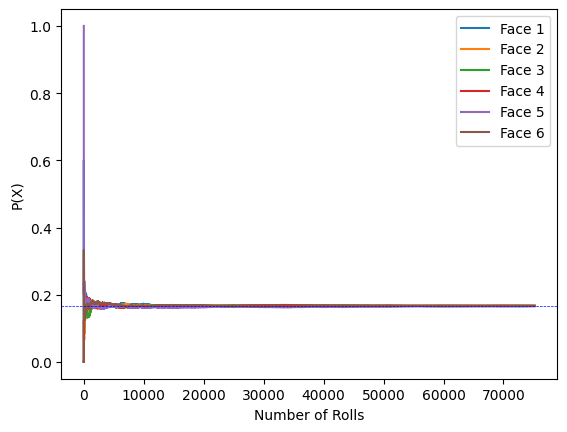

In [8]:
faces = [0] * 6
probs = [0] * 6

def finding_probability(max_iterations):
    tol = 1e-3
    count = 1
    prob_values = [] # here we will store the list of probs after every roll

    while count <= max_iterations:
        # Roll a dice 
        res = roll_a_dice()
        # Increase the count of the dice result value
        faces[res-1] += 1
        # calculating probability after every roll
        for i in range(6):
            probs[i] = faces[i] / count

        prob_values.append(probs[:]) 

        # checking if probability of every combination converges to 1/6 or not
        #if yes then returning count(number of rolls) and prob_values(which we will use for plotting graph)
        if all(abs(prob - 1/6) <= tol for prob in probs):
            return count, prob_values
   
        # increament of count(number of rolls) variable 
        count += 1
    # if every prob doesn't converge to 1/6 then we'll return "None" 
    return None, None

#function to plot graph
def plot_prob(porb_values, step_count):
    steps = np.arange(1, result+1) 
    for i in range(6):
        plt.plot(steps, [prob[i] for prob in prob_values], label=f"Face {i+1}")

    plt.axhline(y = 1/6, linestyle = '--', color = 'b', linewidth = '0.5' )
    plt.xlabel("Number of Rolls")
    plt.ylabel("P(X)")
    plt.legend()
    plt.show()


max_iterations = 1000000
result, prob_values = finding_probability(max_iterations)

if result:
    print(f"Converged after {result} rolls.")
else:
    print(f"Did not converge within {max_iterations} rolls.")

plot_prob(prob_values, result)


### 2(b)


Converged after 139422 rolls.


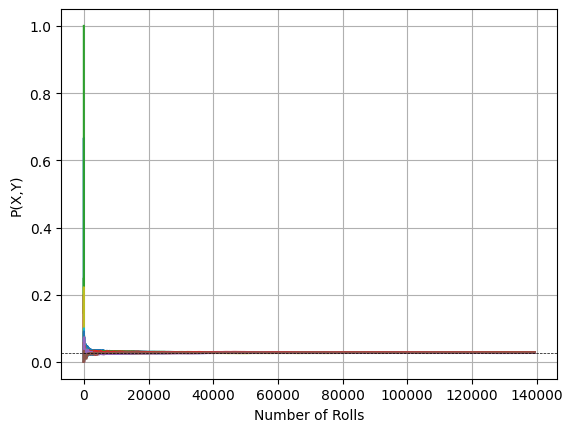

In [9]:
probs_v = np.zeros((6,6))
faces_2d = np.zeros((6,6))

probs_plot = [] 
# we will store the probs_v array (2d) after every roll of die, 
# bassically its a list we'll use it for plotting the graph

def calc_prob_two_random_var():
    tol = 1e-3
    probs_for_plot = []

    f_roll = roll_a_dice() #first roll a die
    count = 1
    while count < 1000000:
        s_roll = roll_a_dice() # second die 
        faces_2d[f_roll-1][s_roll-1] += 1 # increasing the count of (f_roll_value, s_roll_value), eg. (2,3)

        # calculating probability after every roll
        for i in range(6):
            for j in range(6):
                probs_v[i][j] = faces_2d[i][j]/count 

        f_roll = s_roll # assigning the value of current roll to prev roll, to use it in the next roll

        probs_plot.append(np.copy(probs_v))
        
        # checking if probability of every combination converges to 1/36 or not
        flag = True
        for i in range(6):
            for j in range(6):
                if abs(probs_v[i][j] - 1/36) > tol:
                    flag = False
        # if every probs is 1/36+-tol then we will return the count(number of rolls)
        if flag:
            return count

        # increament of count(number of rolls) variable
        count += 1
    # if every prob doesn't converge to 1/36 then we'll return "None" 
    return None


#function to plot graph
def plot_joint_prob(probs, result):
    steps = np.arange(1, result+1)
    for i in range(6):
        for j in range(6):
            prob_series = [p[i][j] for p in probs]
            plt.plot(steps, prob_series, label=f'P({i+1},{j+1})')

    plt.axhline(y = 1/36, linestyle = '--', color = 'black', linewidth = '0.5' )
    plt.xlabel('Number of Rolls')
    plt.ylabel('P(X,Y)')
    # plt.legend()
    plt.grid(True)
    plt.show()

result = calc_prob_two_random_var()

if result:
    print(f"Converged after {result} rolls.")
    plot_joint_prob(probs_plot, result)
else:
    print("Did not converge within 1000000 rolls.")


<h2 style="text-align: center;"> Question 3 </h2>

Given function: $f(x) = 3x + \sin(x) - e^{x}$

=> $f'(x) = 3 + \cos(x) - e^{x}$


In [10]:
def fx(x):
    return 3*x + np.sin(x) - np.exp(x)

def dfx(x):
    return 3 + np.cos(x) - np.exp(x)                                 

### 3(a)


In [11]:
x_values = np.linspace(-3, 3, 1000)
y_values = fx(x_values)

tol = 1e-6

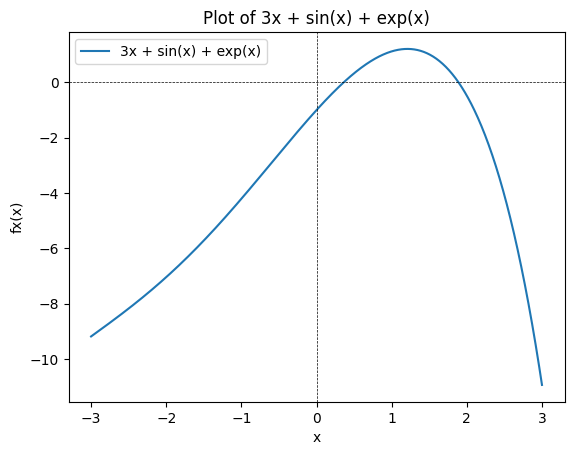

In [12]:
plt.plot(x_values, y_values, label = "3x + sin(x) + exp(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  #X-axis
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  #Y-axis
plt.xlabel('x')
plt.ylabel('fx(x)')
plt.title('Plot of 3x + sin(x) + exp(x)')
plt.legend()
plt.show()

### 3(b)

#### we used recursion for bisection and newton-raphson methods


In [13]:
#Bisection Method (Recursive)
def bisection_method(f, a, b, tol, count):
    # check if the root is available between a and b or not
    if np.sign(f(a)) == np.sign(f(b)): #f(a)*f(b) > 0
        return None, None
        
    mid = (a+b)/2
    if np.abs(f(mid)) < tol:
        return mid, count
    elif np.sign(f(mid)) == np.sign(f(a)): #or we can do f(mid)*f(a) > 0
        #if sign of f(mid) and f(a) is same that means the root lies b/w mid and b
        #so we will call this function itself (recursion) with mid instead of a
        return bisection_method(f, mid, b, tol, count+1)
    elif np.sign(f(mid)) == np.sign(f(b)): #f(mid)*f(b) > 0
        #for this case we'll change the value of b instead of a with mid
        return bisection_method(f, a, mid, tol, count+1)


#Newton Raphson Method (Recursive)
def newton_raphson(f, df, x1, tol, count):
    #recursion elimination condition
    if count>500:
        return None, None   
    x2 = x1 - f(x1)/df(x1)
    if abs(f(x2)) < tol :
        return x2, count
    else:
        return newton_raphson(f, df, x2, tol, count + 1)

### 3(c) + 3(d)


In [14]:
#determine roots using Bisection Method

#from the avobe plotting we can guess the roots
#and also given x0 = 0 and x1 =1
#so lets take a =0 and b =1

a, b = 0, 1
root, count = bisection_method(fx, a, b, tol, 1)
print(f"First Root: {root}, and Iteration count = {count}")

#for another root we can take a = 1.5 and b = 2.5
a, b = 1.5, 2.5
root, count = bisection_method(fx, a, b, tol, 1)
print(f"Second Root: {root}, and Iteration count = {count}")

First Root: 0.36042165756225586, and Iteration count = 21
Second Root: 1.8900299072265625, and Iteration count = 16


In [15]:
#determine roots using Newton-Raphson Method
#given x0 =0

root, count = newton_raphson(fx, dfx, 0, tol, 1)

if root is not None:
    print(f"Root by using x0 =0 : {root}, and Iteration count = {count}")
else:
    print("Root not found")

# we can give x0 = 3 also

root, count = newton_raphson(fx, dfx, 3, tol, 1)

if root is not None:
    print(f"Root by using x0 =3 : {root}, and Iteration count = {count}")
else:
    print("Root not found")

Root by using x0 =0 : 0.36042168047601975, and Iteration count = 3
Root by using x0 =3 : 1.8900298103549664, and Iteration count = 5


### 3(e)

#### We will use Pandas library for forming a table,

Columns of the table are $Iteration, x_{n-1}, x_{n}, x_{n+1}, f(x_{n+1}), Error = f(x_{n+1})-f(root)$

We will create a hashmap (in python dictionary) where keys will be the name of columns and the values will be the list of values for that column


In [26]:

root = 0.36042165756225586

data = {
    "Iteration": [],
    "x_n-1": [],
    "x_n": [],
    "x_n+1": [],
    "f(x_n+1)": [],
    "Error": [] 
}

#collect data using bisection method
def bisection_method_to_form_table(f, a, b, tol, count):

    if np.sign(f(a)) == np.sign(f(b)):
        return None

    mid = (a+b)/2
    
    data["Iteration"].append(count)
    data["x_n-1"].append(a)
    data["x_n"].append(b)
    data["x_n+1"].append(mid)
    data["f(x_n+1)"].append(f(mid))
    data["Error"].append(abs(f(mid) - f(root)))

    if np.abs(f(mid)) < tol:
        return None
    elif np.sign(f(mid)) == np.sign(f(a)): 
        return bisection_method_to_form_table(f, mid, b, tol, count+1)
    elif np.sign(f(mid)) == np.sign(f(b)): 
        return bisection_method_to_form_table(f, a, mid, tol, count+1)
    
bisection_method_to_form_table(fx,0,1, tol, 1)
pd.DataFrame(data)

,Iteration,x_n-1,x_n,x_n+1,f(x_n+1),Error
0,1,0.000000,1.000000,0.500000,3.307043e-01,0.330704
1,2,0.000000,0.500000,0.250000,-2.866215e-01,0.286621
2,3,0.250000,0.500000,0.375000,3.628111e-02,0.036281
3,4,0.250000,0.375000,0.312500,-1.218994e-01,0.121899
4,5,0.312500,0.375000,0.343750,-4.195597e-02,0.041956
5,6,0.343750,0.375000,0.359375,-2.619635e-03,0.002620
6,7,0.359375,0.375000,0.367188,1.688575e-02,0.016886
7,8,0.359375,0.367188,0.363281,7.146742e-03,0.007147
8,9,0.359375,0.363281,0.361328,2.266965e-03,0.002267
9,10,0.359375,0.361328,0.360352,-1.754828e-04,0.000175


<h2 style="text-align: center;"> Question 4 </h2>

Given function: $f(x) = x^3 - x$

=> $f'(x) = 3x^2 - 1$


In [17]:
def f(x):
    return x**3-x
    
def df(x):
    return 3*x**2-1

def newton_raphson(f, df, x1, tol, count):
    if count>500:
        return None 
    x2 = x1 - f(x1)/df(x1)
    if abs(f(x2)) < tol :
        return x2
    else:
        return newton_raphson(f, df, x2, tol, count+1)



In [18]:
x_range = np.linspace(-1.5, 1.5, 60) #We are taking 100 points (values) b/w [-1.5,1.5]
tol = 1e-6
result = {} #We will store the result here ,as x : root


In [19]:
for x0 in x_range:
    root = newton_raphson(f, df, x0, tol, 1)
    if root is not None:
        result[x0] = root

In [20]:
print(result)

{-1.5: -1.000000000015063, -1.4491525423728813: -1.0000000000017983, -1.3983050847457628: -1.0000003150880752, -1.347457627118644: -1.0000000714749318, -1.2966101694915255: -1.0000000117780359, -1.2457627118644068: -1.0000000012393182, -1.194915254237288: -1.0000000000667821, -1.1440677966101696: -1.0000000000012044, -1.0932203389830508: -1.0000000422544386, -1.042372881355932: -1.0000000001204339, -0.9915254237288136: -1.000000018112797, -0.9406779661016949: -1.0000000046259905, -0.8898305084745762: -1.0000000000017855, -0.8389830508474576: -1.0000000022431224, -0.7881355932203389: -1.000000000000443, -0.7372881355932203: -1.0000000040084047, -0.6864406779661016: -1.000000000146411, -0.635593220338983: -1.0000000083835332, -0.5847457627118644: -1.0000000001189704, -0.5338983050847457: 1.0000000000267926, -0.48305084745762716: 1.0000000003656508, -0.43220338983050843: 1.7068560920121406e-17, -0.3813559322033897: -2.15983406561069e-15, -0.3305084745762712: 3.382141893458479e-08, -0.2796

<h2 style="text-align: center;"> Question 5 </h2>
<h4 style="text-align: center;"> we will write general code to solve this problem </h4>


In [21]:
def swap_rows(A,i,j):
    '''
    Interchange rows i and j of a matrix A
    Note the identity matrix E is always a square matrix
    Swap rows of identity matrix E to interchange rows of A
    Returns E @ A
    '''
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A


def scale_row(A,s,i):
    '''
    A: a matrix 
    s: scale factor
    Multiply row i of A by scale factor s
    '''
    n = A.shape[0]
    E = np.eye(n)
# [i,i] is the index of diagonal element of row i that is scaled by s
    E[i,i] = s
    return E @ A


def add_row(A,m,i,j):
    
    '''
    m: multiplier
    Add m times row j to row i in a matrix A
    '''
    # n stores the the size of a matrix A of size n x n
    n = A.shape[0] # row dimension of A
    E = np.eye(n) # nxn identity matrix
    if i==j:
        E[i,j] = m + 1
    else:
        E[i,j] = m
    return E @ A

### 5(a)

After pivoting, for backsubstiton we used a formula for this
$x_{i} = \frac {a_{in} - \sum_{j=i+1}^{n-1} a_{ij}x_{j}} {a_{ii}}$


In [22]:
def partial_pivoting_method(mat):
    shape = np.shape(mat)
    # matrix of m x n
    m = shape[0]
    n = shape[1]
    max_val_row = [0]* m
    
    #determining maximum value contain rows for each column
    for i in range(m):
        max_val_row[i] = i
        for j in range(i,n-1,1):
            if abs(mat[j][i]) > abs(mat[i][max_val_row[i]]) :
                max_val_row[i] = j

    cnt = 0 # number of row interchanges
    #here we are swaping rows with the max value rows and then pivoting(column by column)
    for i in range(m):
        if max_val_row[i] != i:
            mat = swap_rows(mat, i, max_val_row[i])
            cnt += 1
        mat = pivoting(mat, i, m)

    x = backsubstitution(mat) # this `x` contains the value of solutions (eg- x0,x1,x2...)

    print(f"final matrix after partial pivoting:\n{mat}")
    print(f"Number of row interchanges: {cnt}")
    print(f"SOLUTIONS: {x}")

    
#function to do pivoting
def pivoting(mat, target_col, total_row):
    # mat = scale_row(mat, 1/mat[target_col][target_col],target_col)
    for i in range(target_col + 1, total_row):
        m = mat[i][target_col]/mat[target_col][target_col]
        mat = add_row(mat, -1 * m, i, target_col)
    return mat

#function for backsubstitution and it will return a list of solutions 
def backsubstitution(mat):
    shape = mat.shape
    m = shape[0]
    n = shape[1]

    x = [0] * m 
    x[m-1] = mat[m-1][n-1] / mat[m-1][m-1] 
    for i in range(m-2,-1,-1):
        ax = 0
        for j in range (i+1, n-1):
            ax += mat[i][j] * x[j]
        x[i] = (mat[i][n-1] - ax) / mat[i][i]

    return x



partial_pivoting_method(np.array([(1, -2, 4, 6), (8, -3, 2, 2), (-1, 10, 2, 4)]))

final matrix after partial pivoting:
[[ 8.         -3.          2.          2.        ]
 [ 0.          9.625       2.25        4.25      ]
 [ 0.          0.          4.12987013  6.46753247]]
Number of row interchanges: 2
SOLUTIONS: [-0.1132075471698113, 0.07547169811320759, 1.5660377358490565]


### 5(b)


In [23]:
def partial_pivoting_3decimal(mat):
    shape = np.shape(mat)
    m = shape[0]
    n = shape[1]
    max_val_row = [0] * m
    
    #determining maximum value contain rows for each column
    for i in range(m):
        max_val_row[i] = i
        for j in range(i,n-1,1):
            if abs(mat[j][i]) > abs(mat[i][max_val_row[i]]) :
                max_val_row[i] = j

    cnt = 0
    #here we are swaping rows with the max value rows and then pivoting(column by column)
    for i in range(m):
        if max_val_row[i] != i:
            mat = swap_rows(mat, i, max_val_row[i]).round(3)
            cnt += 1
        mat = pivoting(mat, i, m).round(3)

    x = backsubstitution(mat) # this `x` contains the value of solutions (eg- x0,x1,x2...)

    print(f"final matrix after partial pivoting (three significant digits of precision):\n{mat}")
    print(f"Number of row interchanges: {cnt}")
    print(f"SOLUTIONS: {x}")

    
#function to do pivoting
def pivoting(mat, target_col, total_row):
    # mat = scale_row(mat, 1/mat[target_col][target_col],target_col)
    for i in range(target_col + 1, total_row):
        m = mat[i][target_col]/mat[target_col][target_col]
        mat = add_row(mat, -1 * m, i, target_col).round(3)
    return mat

#function for backsubstitution and it will return a list of solutions 
def backsubstitution(mat):
    shape = mat.shape
    m = shape[0]
    n = shape[1]

    x = [0] * m 
    x[m-1] = mat[m-1][n-1] / mat[m-1][m-1] 
    for i in range(m-2,-1,-1):
        ax = 0
        for j in range (i+1, n-1):
            ax += mat[i][j] * x[j]
        x[i] = (mat[i][n-1] - ax) / mat[i][i]

    return np.round(x,3)


partial_pivoting_3decimal(np.array([(1, -2, 4, 6), (8, -3, 2, 2), (-1, 10, 2, 4)]))

final matrix after partial pivoting (three significant digits of precision):
[[ 8.    -3.     2.     2.   ]
 [ 0.     9.625  2.25   4.25 ]
 [ 0.     0.     4.13   6.468]]
Number of row interchanges: 2
SOLUTIONS: [-0.113  0.075  1.566]


### 5(c)


In [24]:
def partial_pivoting_3decimal_without_row_interchange(mat):
    shape = np.shape(mat)
    m = shape[0]
    n = shape[1]
    max_val_row = [0]* m
    
    #determining maximum value contain rows for each column
    for i in range(m):
        max_val_row[i] = i
        for j in range(i,n-1,1):
            if abs(mat[j][i]) > abs(mat[i][max_val_row[i]]) :
                max_val_row[i] = j

    cnt = 0
    #pivoting(column by column)
    for i in range(m):
        mat = pivoting(mat, i, m).round(3)

    x = backsubstitution(mat) # this `x` contains the value of solutions (eg- x0,x1,x2...)

    print(f"final matrix after partial pivoting (three significant digits of precision & without row interchage):\n{mat}")
    print(f"Number of row interchanges: {cnt}")
    print(f"SOLUTIONS: {x}")

    
#function to do pivoting
def pivoting(mat, target_col, total_row):
    # mat = scale_row(mat, 1/mat[target_col][target_col],target_col)
    for i in range(target_col + 1, total_row):
        m = mat[i][target_col]/mat[target_col][target_col]
        mat = add_row(mat, -1 * m, i, target_col).round(3)
    return mat


def backsubstitution(mat):
    shape = mat.shape
    m = shape[0]
    n = shape[1]

    x = [0] * m 
    x[m-1] = mat[m-1][n-1] / mat[m-1][m-1] 
    for i in range(m-2,-1,-1):
        ax = 0
        for j in range (i+1, n-1):
            ax += mat[i][j] * x[j]
        x[i] = (mat[i][n-1] - ax) / mat[i][i]

    return np.round(x,3)


partial_pivoting_3decimal_without_row_interchange(np.array([(1, -2, 4, 6), (8, -3, 2, 2), (-1, 10, 2, 4)]))

final matrix after partial pivoting (three significant digits of precision & without row interchage):
[[  1.     -2.      4.      6.   ]
 [  0.     13.    -30.    -46.   ]
 [  0.      0.     24.462  38.308]]
Number of row interchanges: 0
SOLUTIONS: [-0.113  0.075  1.566]
